# **MUSIC RECOMMENDATION SYSTEM**

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('data 2.csv')

In [ ]:
df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


In [3]:
genre_data = pd.read_csv('/content/data_by_genres.csv')

In [4]:
year_data = pd.read_csv('/content/data_by_year.csv')

In [ ]:
year_data

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,2016,0.284171,0.600202,221396.510295,0.592855,0.093984,0.181170,-8.061056,0.104313,118.652630,0.431532,59.647190,0
96,1,2017,0.286099,0.612217,211115.696787,0.590421,0.097091,0.191713,-8.312630,0.110536,117.202740,0.416476,63.263554,1
97,1,2018,0.267633,0.663500,206001.007133,0.602435,0.054217,0.176326,-7.168785,0.127176,121.922308,0.447921,63.296243,1
98,1,2019,0.278299,0.644814,201024.788096,0.593224,0.077640,0.172616,-7.722192,0.121043,120.235644,0.458818,65.256542,1


In [ ]:
df.isnull().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [ ]:
genre_data.isnull().sum()

mode                0
genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64

In [ ]:
year_data.isnull().sum()

mode                0
year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64

In [5]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [ ]:
df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921-01-01,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921-01-01,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921-01-01,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921-01-01,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921-01-01,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


In [6]:
df.drop(['id'], axis= 1, inplace=True)

In [24]:
df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,Year,Decade
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921-01-01,0.0366,80.954,1921,1920
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921-01-01,0.4150,60.936,1921,1920
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921-01-01,0.0339,110.339,1921,1920
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921-01-01,0.0354,100.109,1921,1920
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921-01-01,0.0380,101.665,1921,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029,2020,2020
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936,2020,2020
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688,2020,2020
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055,2020,2020


# EDA

In [25]:
df.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,Year,Decade
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590,1976.787241,1972.263482
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533,25.917853,25.992520
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,1921.000000,1920.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000,1956.000000,1950.000000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000,1977.000000,1970.000000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000,1999.000000,1990.000000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000,2020.000000,2020.000000


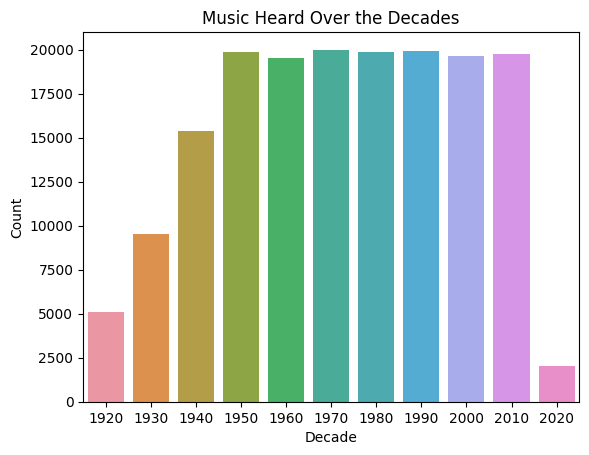

In [7]:
# Group years into decades
df['Decade'] = (df['year'] // 10) * 10

# Count the occurrences of each decade
decade_counts = df['Decade'].value_counts().sort_index()

# Create a DataFrame from the counts
data = pd.DataFrame({'Decade': decade_counts.index, 'Count': decade_counts.values})

# Plotting the bar graph using Seaborn
sns.barplot(x='Decade', y='Count', data=data)

# Customizing the graph
plt.xlabel('Decade')
plt.ylabel('Count')
plt.title('Music Heard Over the Decades')

# Displaying the graph
plt.show()


In [8]:
import plotly.express as px
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']
fig = px.line(year_data, x='year', y=sound_features)
fig.show()

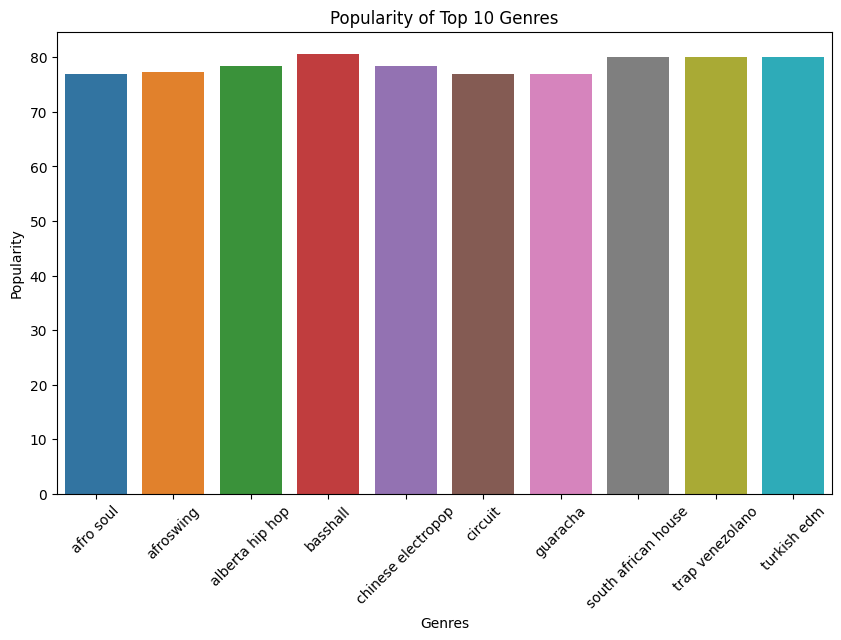

In [9]:
genres_column = 'genres'  # Replace 'genres' with the actual column name
popularity_column = 'popularity'  # Replace 'popularity' with the actual column name

# Calculate the mean popularity for each genre
genre_popularity = genre_data.groupby(genres_column)[popularity_column].mean()

# Select the top 10 genres
top_10_genres = genre_popularity.nlargest(10)

# Create a DataFrame with top 10 genres and their popularity
top_10_data = genre_data[genre_data[genres_column].isin(top_10_genres.index)]

# Create a scatter plot to visualize the popularity of the top 10 genres
plt.figure(figsize=(10, 6))
sns.barplot(x=genres_column, y=popularity_column, data=top_10_data)
plt.xlabel('Genres')
plt.ylabel('Popularity')
plt.title('Popularity of Top 10 Genres')
plt.xticks(rotation=45)
plt.show()

# Model

In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a copy of the DataFrame
df_encoded = df.copy()

# Iterate over each column in the DataFrame
for column in df_encoded.columns:
    # Check if the column dtype is non-numerical or datetime
    if df_encoded[column].dtype == 'object' or df_encoded[column].dtype == 'datetime64[ns]':
        # Initialize LabelEncoder
        label_encoder = LabelEncoder()
        # Convert the non-numerical column values to numerical
        df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

# Check the updated DataFrame with label-encoded values
print(df_encoded)


        valence  year  acousticness  artists  danceability  duration_ms  \
0        0.0594  1921       0.98200    26839         0.279       831667   
1        0.9630  1921       0.73200     7382         0.819       180533   
2        0.0394  1921       0.96100    16378         0.328       500062   
3        0.1650  1921       0.96700    10077         0.275       210000   
4        0.2530  1921       0.95700    23719         0.418       166693   
...         ...   ...           ...      ...           ...          ...   
170648   0.6080  2020       0.08460     2159         0.786       301714   
170649   0.7340  2020       0.20600     2498         0.717       150654   
170650   0.6370  2020       0.10100    19497         0.634       211280   
170651   0.1950  2020       0.00998     8943         0.671       337147   
170652   0.6420  2020       0.13200    16375         0.856       189507   

        energy  explicit  instrumentalness  key  liveness  loudness  mode  \
0        0.211        

# Random Forest

In [11]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming 'popularity' is the target variable and all other columns are features
features = df_encoded.drop(['popularity', 'Decade', 'year'], axis=1)
target = df_encoded['popularity']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 81.96695720740232


In [12]:
from sklearn.metrics import r2_score
# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

# Print the R2 score
print("R2 Score:", r2)


R2 Score: 0.8287063754643818


# Feature Selection

In [13]:
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd

# Assuming you have X_train, X_test, y_train, y_test

# Create a new DataFrame with the features
df_features = pd.DataFrame(X_train, columns=['valence', 'year' ,'acousticness', 'artists', 'danceability', 'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key','liveness','loudness','mode','name','release_date','speechiness','tempo','Decade'])

# Create a SelectKBest object with the desired number of features
k = 5  # Select the top 5 features
selector = SelectKBest(score_func=f_regression, k=k)

# Fit the selector to the training data and transform the feature matrix
X_train_selected = selector.fit_transform(X_train, y_train)

# Transform the test feature matrix using the selector
X_test_selected = selector.transform(X_test)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = df_features.columns[selected_indices]

# Print the selected feature names
print("Selected Features:", selected_features)


Selected Features: Index(['year', 'duration_ms', 'explicit', 'liveness', 'name'], dtype='object')


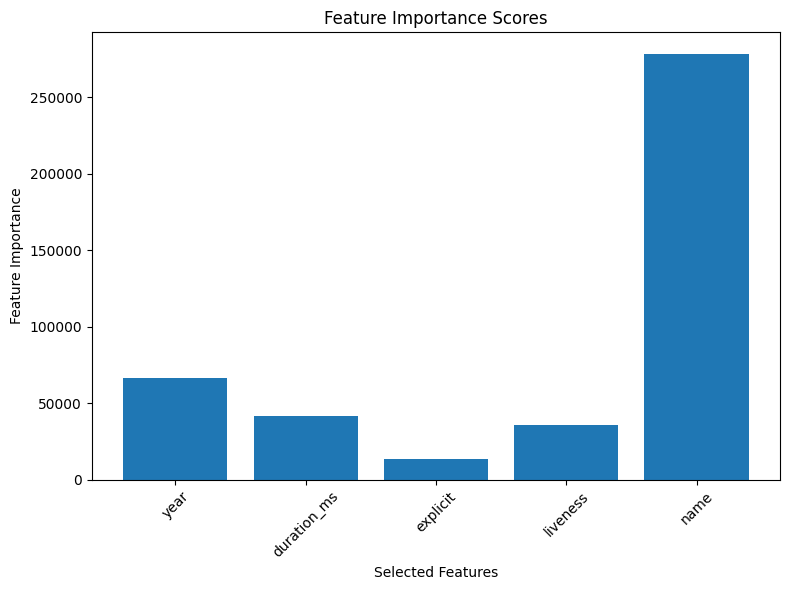

In [14]:
# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(range(len(selected_features)), selector.scores_[selected_indices], align='center')
plt.xticks(range(len(selected_features)), selected_features, rotation=45)
plt.xlabel('Selected Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Scores')
plt.tight_layout()
plt.show()

# SVM

In [14]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the SGDClassifier model with linear kernel
svm_model = SGDClassifier(loss='hinge', penalty='l2', alpha=0.0001, random_state=42)

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.176320646919223
Precision: 0.02195645405156391
Recall: 0.02483220456838806
F1 Score: 0.016851311872822388


In [20]:
# Select the common columns for merging
common_columns = ['valence', 'popularity', 'acousticness', 'danceability']

# Merge the datasets based on common columns
df_merged = pd.merge(df, genre_data, on=common_columns, how='left')
df_merged = pd.merge(df_merged, year_data, on=common_columns, how='left')

# Print the merged dataset
print(df_merged.head())

   valence  year_x  acousticness  \
0   0.0594    1921         0.982   
1   0.9630    1921         0.732   
2   0.0394    1921         0.961   
3   0.1650    1921         0.967   
4   0.2530    1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                   ['Frank Parker']         0.275   
4                                     ['Phil Regan']         0.418   

   duration_ms_x  energy_x  explicit  instrumentalness_x  key_x  ...  mode  \
0         831667     0.211         0            0.878000     10  ...   NaN   
1         180533     0.341         0            0.000000      7  ...   NaN   
2         500062     0.166         0            0.913000      3  ...   NaN   
3         210000     0.309         0            0.

In [37]:
unique_song_names = df_merged['name'].unique().tolist()
for song_name in unique_song_names:
    print(song_name)


Streaming output truncated to the last 5000 lines.
Wedding Chorale / Beggars at the Feast
Don't Stop The Dance - Todd Terje Remix
Hain's Point
We've Got to Stop (Meeting Like This)
Cuando Estemos Juntos
心裡日記 - 電影《打工皇帝》插曲
Cumbia Chonera
Where Do The Children Go
The Price Of Love
Charm the Snake
Lucky In Love
下雨天
Las Dos Hermanas
夢のつづき
The Promise - 2010 Remaster
Have You Ever Seen the Rain
A Pistol for Paddy Garcia
Sanctified Lady
夢伴
The Ballad of Sally Rose
Coconut Grove
Screaming for a Love-Bite
Winning the War
Theme from Mash
Mary's New Car
Two Rivers
The Big Chair
Please Don't Walk Away
Save Black Music
Walls of Jericho/Ride the Sky
Lay It Down Clown - 2008 Remaster
City Boy Blues - Demo
O.C. Life
Rachel
Beat The System - Beat The System Album Version
May There Always Be Sunshine
Boys And Girls
American Girl - Live At The Wiltern/1985
Every Turn of the World
SILENCE GA IPPAI
The Character
Easy Lover - Live 1997
Stone Woman
Fistful Of Diamonds
Beautiful End
Radio Heart
MISHIMA/Openin

# Final Recommendation based on song of choice

In [57]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# Fill missing values in the 'genres' column
df_merged['genres'].fillna('', inplace=True)

# Vectorize the genre feature
vectorizer = TfidfVectorizer()
genre_matrix = vectorizer.fit_transform(df_merged['genres'])

# Compute the cosine similarity matrix based on the genre feature
similarity_matrix = cosine_similarity(genre_matrix)

# Modify the recommend_music function to return indices
def recommend_music(song_name, top_n=5):
    song_index = df_merged[df_merged['name'] == song_name].index[0]
    similarity_scores = similarity_matrix[song_index]
    similar_song_indices = similarity_scores.argsort()[::-1][1:top_n+1]
    return similar_song_indices

# Example usage
song_name = 'Halloweenie III: Seven Days'
recommended_song_indices = recommend_music(song_name, top_n=5)
print(f"Recommended songs for {song_name}:")
for song_index in recommended_song_indices:
    song = df_merged.loc[song_index]
    print(f"Song: {song['name']}\nArtist: {song['artists']}\nYear: {song['year_x']}\n")


Recommended songs for Halloweenie III: Seven Days:
Song: Generation Why
Artist: ['Conan Gray']
Year: 2018

Song: Naked - Bonus Track
Artist: ['Ella Mai']
Year: 2018

Song: Otherside
Artist: ['Post Malone']
Year: 2018

Song: X (with 2 Chainz & Saudi)
Artist: ['ScHoolboy Q', '2 Chainz', 'Saudi']
Year: 2018

Song: Don't Come Out The House (with 21 Savage)
Artist: ['Metro Boomin', '21 Savage']
Year: 2018



In [46]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


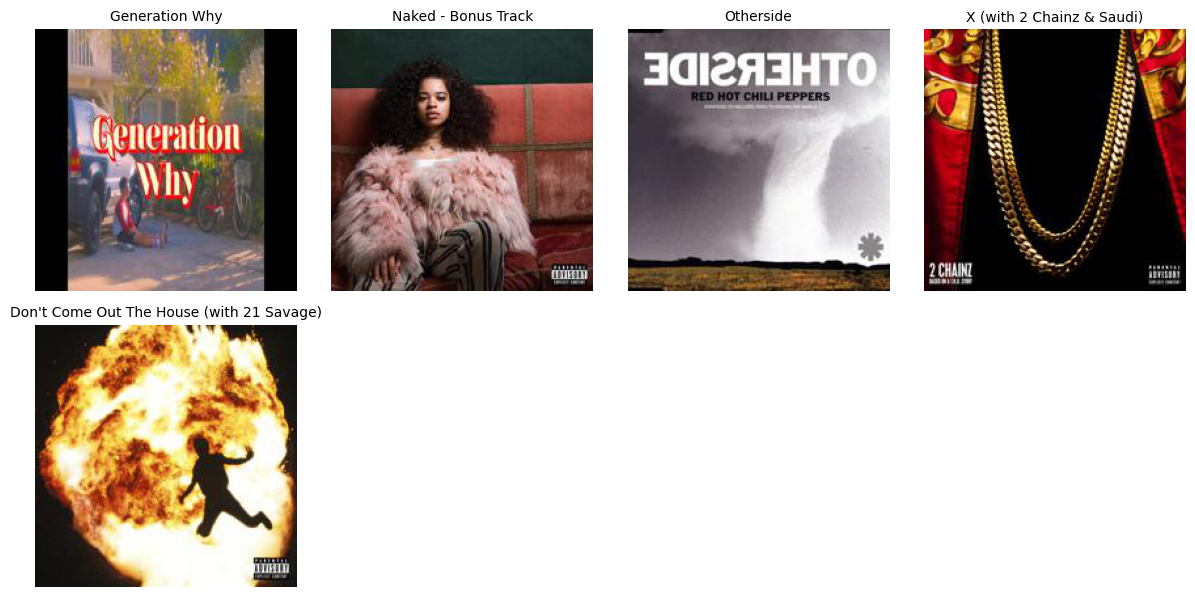

In [51]:
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image

def display_visual_playlist(recommended_songs):
    fig = plt.figure(figsize=(12, 12))

    for i, song in enumerate(recommended_songs):
        # Download the album cover image
        image_url = song['album_cover_url']
        urllib.request.urlretrieve(image_url, f"album_cover_{i}.jpg")

        # Resize the image
        img = Image.open(f"album_cover_{i}.jpg")
        img = img.resize((200, 200))  # Adjust the size as per your requirement
        img.save(f"album_cover_{i}.jpg")

        # Load and display the resized album cover image
        img = plt.imread(f"album_cover_{i}.jpg")
        ax = fig.add_subplot(4, 4, i+1)
        ax.imshow(img)
        ax.axis('off')

        # Add the song name as a caption
        ax.set_title(song['song_name'], fontsize=10, ha='center')

    plt.tight_layout()
    plt.show()
# Example usage with placeholder data
recommended_songs = [
    {'album_cover_url': 'https://i.ytimg.com/vi/qIz8-GpUAWk/maxresdefault.jpg', 'song_name': 'Generation Why'},
    {'album_cover_url': 'https://i.scdn.co/image/ab67616d0000b2737ce0faf0620ab9c1779e1fbf', 'song_name': 'Naked - Bonus Track'},
    {'album_cover_url': 'https://upload.wikimedia.org/wikipedia/en/c/c9/Red_hot_chili_peppers_otherside.jpg', 'song_name': 'Otherside'},
    {'album_cover_url': 'https://i.scdn.co/image/ab67616d00001e020bcccf7c7e65f294c2430f9b', 'song_name': 'X (with 2 Chainz & Saudi)'},
    {'album_cover_url': 'https://i1.sndcdn.com/artworks-jJWE9D2ygJ6o-0-t500x500.jpg', 'song_name': "Don't Come Out The House (with 21 Savage)"}
]

display_visual_playlist(recommended_songs)